corrProtoss: 0.8938233232788555
corrZerg: 0.8509175533607386
corrTerran: 0.9023140771998815
corr worker and win: 0.03290900166179505
corr army and win: 0.00040665951800632


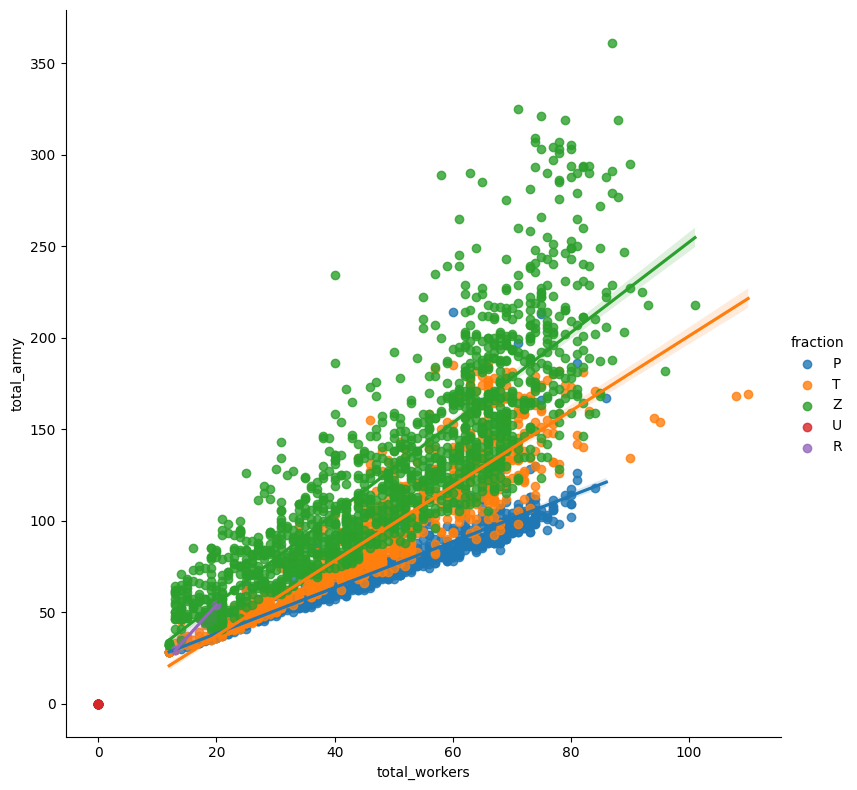

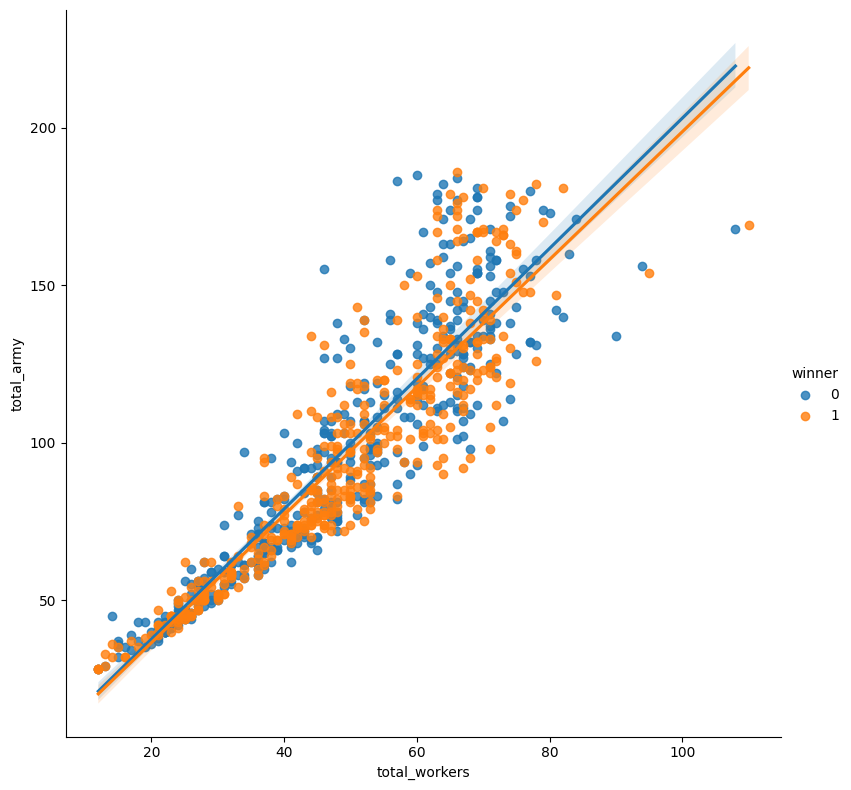

In [1]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army", hue="winner", data=dfTerran[["total_workers", "total_army", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


corrProtoss: 0.6140635507731361
corrZerg: 0.7184028087708204
corrTerran: 0.776848707824173
corr worker and win: 0.03290900166179505
corr army and win: -0.031389213486439825


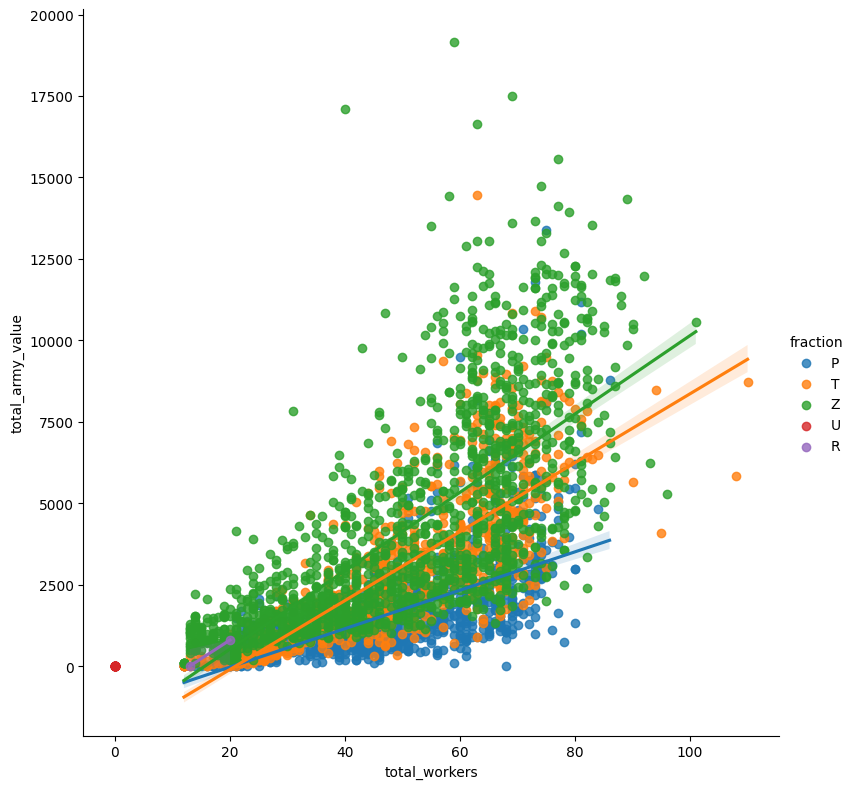

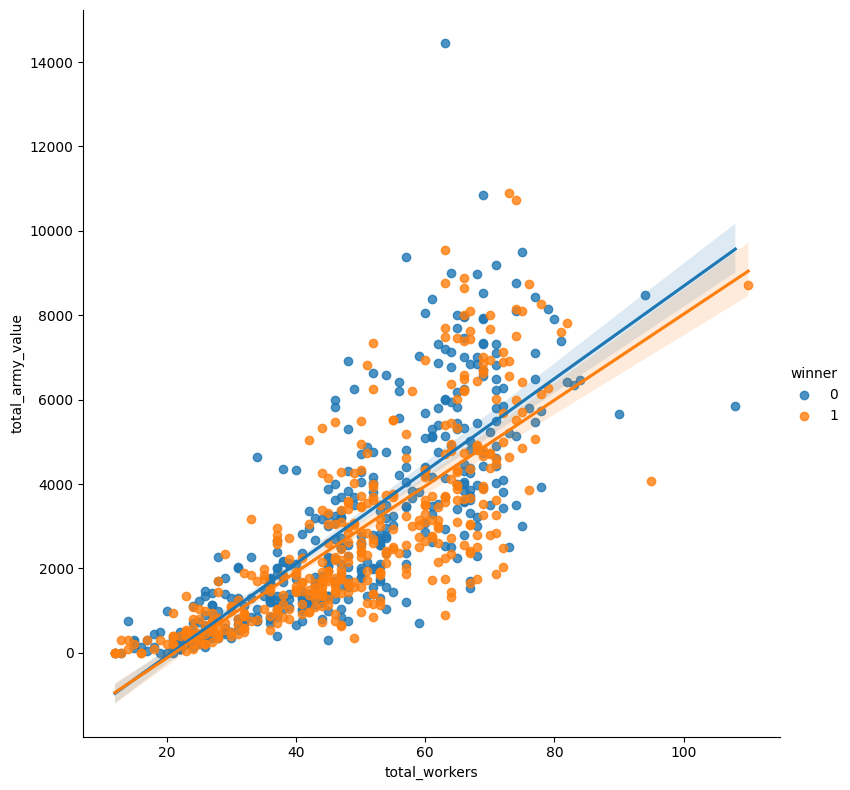

In [3]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army_value"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army_value"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army_value"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="winner", data=dfTerran[["total_workers", "total_army_value", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army_value"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


<Axes: >

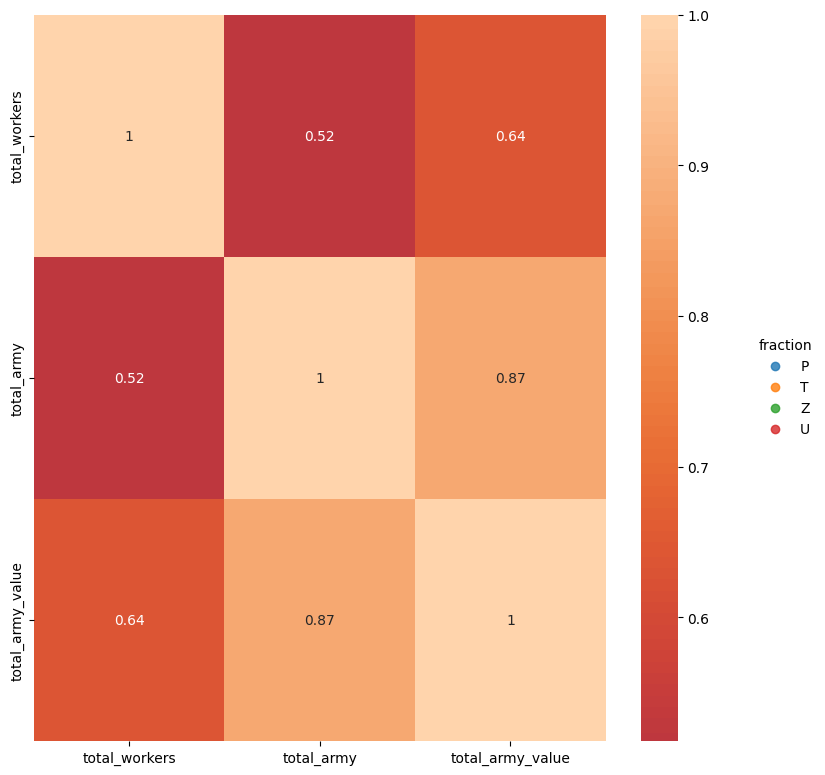

In [11]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

sns.heatmap(df[["total_workers","total_army","total_army_value"]].corr(), annot=True, center=0)

In [19]:
# regression without scaling

import pandas as pd
import warnings

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df = pd.concat([df1, df2])

dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")


The R^2 value in the test set is 0.5397953597337526


In [6]:
# optimizer with scaling

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr

df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

"""
df = pd.concat([df1, df2])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]

print(dfTerranOpt)
# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","total_army_value", "player", "replay_filename", "winner", "fraction", "Unnamed: 0"])
print(dfTerranOpt)
# create Model
m = gp.Model("Worker optimizer")

# create variables
av = gppd.add_vars(m,lb=0,pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,lb=0,pandas_obj=dfTerranOpt, name="total_workers")
a = gppd.add_vars(m,lb=0,pandas_obj=dfTerranOpt, name="total_army")
m.update()

feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)

print(feats)

m.setObjective(av.sum(), gp.GRB.MAXIMIZE)
m.addConstr(w + a, gp.GRB.GREATER_EQUAL, 0)
m.addConstr(w + a, gp.GRB.LESS_EQUAL , 200)
m.update()

pred_constr = add_predictor_constr(m, lin_reg, feats, av, output_type="int")
pred_constr.print_stats()

# m.Params.NonConvex = 2
m.optimize()

print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)

print(outputs)

"""s#




dfTerranOpt = dfTerranOpt.loc[:, features]

m.update()

dfTerranOpt[:10]





"""


The R^2 value in the test set is 0.9143379471734923
     Unnamed: 0      player  total_workers  total_army_value  total_army  \
0             0        MaSa             46              2275          29   
1             1         MMA             68              3000          23   
2             2        Raze             63              6025          60   
3             3        ByuN             56              6425          86   
4             4       Ziggy             23               500           5   
..          ...         ...            ...               ...         ...   
188         188     FanTaSy             69              7325          67   
189         189        TYTY             67              3725          43   
190         190      doudou             62              3525          47   
191         191      jheffe             24               150           2   
192         192  HeRoMaRinE             47              1900          20   

    fraction  winner               

TypeError: list indices must be integers or slices, not tuple